In [ ]:
# 도미 데이터
bream_length = [
    25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
    31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
    35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0
  ]
bream_weight = [
    242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
    500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
    700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0
  ]

In [ ]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

도미와 빙어의 데이터를 그래프를 만들어서 본다.

In [ ]:
import matplotlib.pyplot as plt

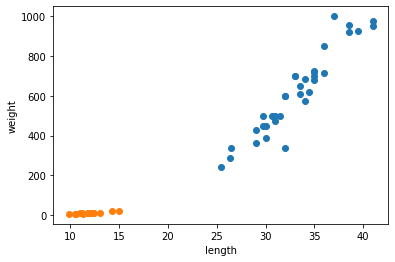

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

도미와 빙어의 데이터를 합친다

length와 weight에 합친후 fish_data 배열에 집어넣는다.

fish_target을 이용해서 도미는 1 빙어를 0으로 만들어준다. 도미인지 아닌지 판단하기 위해서 target을 이용하였다.

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [ [l, w] for l, w in zip(length, weight)]
fish_target=[1]*35 + [0]*14

fit과 score를 통해 평가 할 수 있다.

fit으로 모델을 만들고 학습하고 score를 통해 모델에 대한 평가를 할 수 있다.

아래 코드같은 경우에는 학습된 데이터에 대한 score를 냈기 때문에 1.0이 출력된다.

fit()
*   모델을 훈련할 때 사용하는 메서드
*   훈련에 사용할 특성과 정답 데이터를 매개변수로 전달한다.

score()

*   사이킷런 모델의 성능을 측정하는 메서드
*   매개변수로 특성과 정답 데이터를 전달
*   분류 모델인 경우, 예측 수행 후, 정답과 비교하여 올바르게 예측한 개수의 비율을 반환






In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

predict 메서드를 이용해 데이터의 결과를 미리 예측해 볼 수 있다.

predict()

*    사이킷런 모델을 예측할 때 사용하는 메서드
*    특성 데이터 하나만 매개변수로 전달

In [ ]:
kn.predict([[30,600]])

array([1])

In [ ]:
kn.predict([[10,8]])

array([0])

훈련 세트와 테스트 세트를 만든다

하지만 아래 코드와 같이 만들면 34번까지의 data에는 도미가 들어가있고 35~49번 코드까지는 빙어가 들어가있기에 올바른 훈련데이터와 테스트데이터로 이루어지지 않는다.

In [ ]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

train 과 test의 data를 편향적으로 만들었기 때문에 score는 0이 나오게 된다.

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

데이터가 편향되지 않게 섞기 위해 numpy를 이용한다

In [ ]:
import numpy as np

fish_data와 fish_target을 numpy 배열에 넣는다.

In [ ]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

데이터들의 인덱스를 붙이고 np.random.shuffle을 이용해 인덱스값을 섞는다.

In [ ]:
index = np.arange(49)
np.random.shuffle(index)
print(index)

[46 18 10 17 28 32 20 21 25 47 15  0 35  1 40 23 39 14 41  3 37  4 29  8
 22 44  2 13 31 38 26 30  6 12 27  9  5 19 42 48 11  7 16 43 33 45 24 36
 34]


위에 사용했던 것 처럼 35까지 슬라이싱을 하여 train데이터와 test데이터를 나눈다.

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

train 데이터와 test 데이터가 적절히 섞여있는 모습을 볼 수 있다.

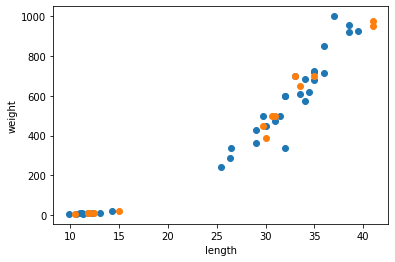

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict(test_input)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
test_target

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

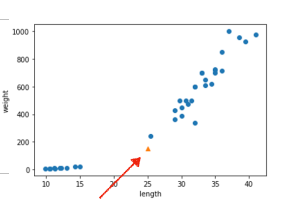

25,150은 우리의 눈으로 봤을 때는 도미쪽에 가까운데 컴퓨터는 빙어라고 가리키고있다.

predict를 이용해서 예측해보았을 때 0이 출력되는 것을 볼 수 있다.

In [ ]:
print(kn.predict([[25,150]]))

[0]


이러한 일이 발생하는 이유는 x축과 y축의 scale이 다르기 때문에 scale을 맞추는 작업을 해준다.

knighbors를 이용하면 내가 지정한 값에서 가장 가까운 값 5개를 선정하는 것을 볼 수 있다

In [ ]:
distances, indexes = kn.kneighbors([[25,150]])
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]
  [ 26.3 290. ]]]


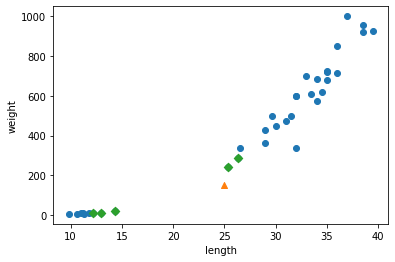

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

넘파이에서 제공하는 평균과 표준편차를 이용한다

mean 평균 std 표준편차

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.40285714 454.42857143] [  9.80482347 316.73504256]


train 데이터를 scale 크기에 맞게 사용할 수 있도록 처리 한다.

In [ ]:
train_scaled = (train_input - mean) / std

In [ ]:
mean = np.mean(test_input, axis=0)
std = np.std(test_input, axis=0)

test_scaled = (test_input - mean) / std

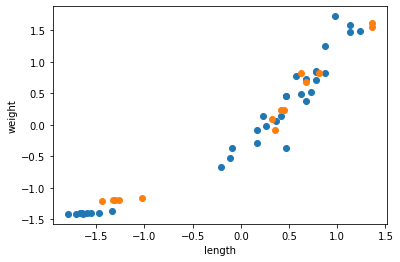

In [ ]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(test_scaled[:,0],test_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.predict([[25,150]])

array([0])

In [ ]:
train_mean = np.mean(train_input, axis=0)
train_std = np.std(train_input, axis=0)

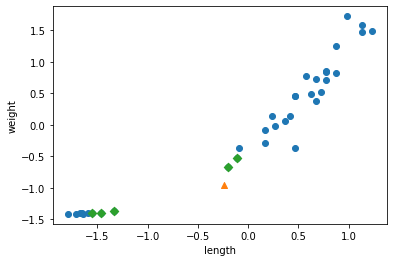

In [ ]:
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(((25-train_mean[0])/train_std[0]),((150-train_mean[1])/train_std[1]),marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

1. "도미 vs 빙어" 에서 스케일이 다른 특성 처리 결과 코드를 제출 하시오.



2. 사이킷런에 있는 다음의 kneighbors()를 numpy 모듈을 사용하여 함수로 작성하시오

사이킷런을 사용하지 않고 거리를 측정해서 가장 가까운 5개를 추출해서 찍어내기

#사이킷런에 있는 다음의 kneighbors()를 numpy 모듈을 사용하여 함수로 작성하시오

사이킷런을 사용하지 않고 거리를 측정해서 가장 가까운 5개를 추출해서 찍어내기

In [ ]:
# 도미 데이터
bream_length = [
    25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
    31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
    35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0
  ]
bream_weight = [
    242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
    500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
    700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0
  ]

In [ ]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import matplotlib.pyplot as plt

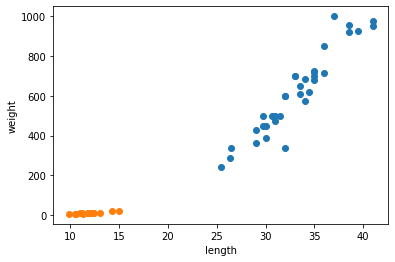

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [ [l, w] for l, w in zip(length, weight)]
fish_target=[1]*35 + [0]*14

In [ ]:
import numpy as np

In [ ]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
index = np.arange(49)
np.random.shuffle(index)
print(index)

[44  0 43 33  6 16 40 18 11 34  2 46 14 41 24 42 45  7 26 28 30 29 36 31
  1 22 20 21 35  3 48 15 10  8 27 39 32 47 23 25 38  9  5  4 13 19 12 37
 17]


In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

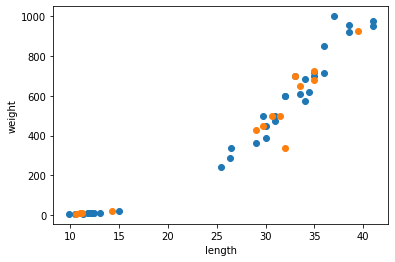

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
a = np.array([25,150])
a

array([ 25, 150])

두점사이의 거리를 재는 식을 함수로 만들고
numpy 배열 a를 거리와 train input의 i값으로 만든다
그 후 for문을 이용해 각 train input값마다 25,150의 거리를 잰다

In [ ]:
def distance_calc(x1,y1,x2,y2):
  distance = (((x1-x2)**2+(y1-y2)**2)**1/2)
  return distance
dtype=[('distance',float),('index',int)]
a = np.empty((len(train_input)),dtype=dtype)
for i in range(len(train_input)):
  distance = distance_calc(train_input[i,0],train_input[i,1],25,150)
  a[i]=(distance,i)
  i += 1
np.set_printoptions(suppress=True)
a

array([(  9576.34 ,  0), (  4232.08 ,  1), (  9912.52 ,  2),
       (340440.5  ,  3), ( 61261.045,  4), (151282.   ,  5),
       ( 10076.69 ,  6), (105836.125,  7), ( 61268.   ,  8),
       (320128.   ,  9), ( 18051.125, 10), (  9566.42 , 11),
       (101274.5  , 12), (  9887.12 , 13), (151300.   , 14),
       (  9901.125, 15), (  9409.16 , 16), ( 28812.5  , 17),
       (162500.   , 18), (245060.5  , 19), (296541.125, 20),
       (361322.   , 21), ( 10258.25 , 22), (324103.625, 23),
       (  9800.845, 24), (110495.125, 25), ( 90353.   , 26),
       (143153.   , 27), ( 10382.965, 28), ( 22692.5  , 29),
       (  8513.005, 30), (101274.5  , 31), ( 52830.5  , 32),
       ( 45012.5  , 33), (159108.5  , 34)],
      dtype=[('distance', '<f8'), ('index', '<i8')])

그 후 거리가 짧은순으로 sort 한다

In [ ]:
min_distance = np.sort(a,order='distance')
min_distance

array([(  4232.08 ,  1), (  8513.005, 30), (  9409.16 , 16),
       (  9566.42 , 11), (  9576.34 ,  0), (  9800.845, 24),
       (  9887.12 , 13), (  9901.125, 15), (  9912.52 ,  2),
       ( 10076.69 ,  6), ( 10258.25 , 22), ( 10382.965, 28),
       ( 18051.125, 10), ( 22692.5  , 29), ( 28812.5  , 17),
       ( 45012.5  , 33), ( 52830.5  , 32), ( 61261.045,  4),
       ( 61268.   ,  8), ( 90353.   , 26), (101274.5  , 12),
       (101274.5  , 31), (105836.125,  7), (110495.125, 25),
       (143153.   , 27), (151282.   ,  5), (151300.   , 14),
       (159108.5  , 34), (162500.   , 18), (245060.5  , 19),
       (296541.125, 20), (320128.   ,  9), (324103.625, 23),
       (340440.5  ,  3), (361322.   , 21)],
      dtype=[('distance', '<f8'), ('index', '<i8')])

5개의 점만을 이용할 것이니 슬라이싱을 해 5개의 점만을 추출한다
그리고 사실 거리는 sort할때만 사용하니 train input의 값을 가져와 배열을 만든다

In [ ]:
for i in range(5):
  print(train_input[min_distance[i][1]])

[ 25.4 242. ]
[15.  19.9]
[12.4 13.4]
[13.  12.2]
[12.2 12.2]


In [ ]:
indexes = np.empty(5)
for i in range(5):
  indexes[i] = min_distance[i][1]

indexes.astype(np.int64)

array([ 1, 30, 16, 11,  0])

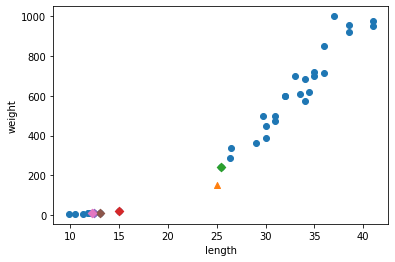

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
for i in range(5):
  plt.scatter(train_input[min_distance[i][1],0],train_input[min_distance[i][1],1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

목차 1, 2, 3, 4, 5, 9, 14 의 실습 코드를 옮겨 작성하고, 파일을 제출 하시오

# 1장

In [ ]:
from __future__ import division, print_function, unicode_literals

In [ ]:
import matplotlib

In [ ]:
%matplotlib inline

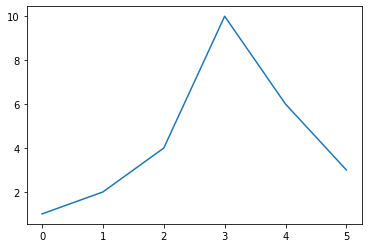

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,4,10,6,3])
plt.show()

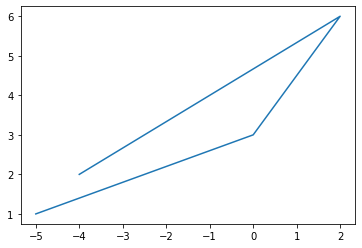

In [ ]:
plt.plot([-5,0,2,-4],[1,3,6,2])
plt.show()

plt.axis를 통해 x,y축의 크기를 설정할 수 있다

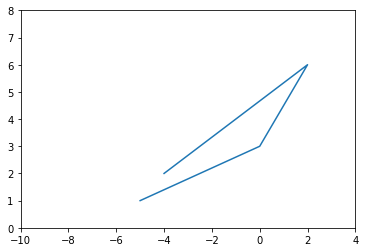

In [ ]:
plt.plot([-5,0,2,-4],[1,3,6,2])
plt.axis([-10,4,0,8])
plt.show()

x = np.linspace(start, stop, num)과 같이 적용

start 는 배열의 시작값,

stop은 배열의 끝 값,
 
num은 start와 stop 사이를 몇개의 일정한 간격으로 요소를 만들것인지를 나타내는 것
만일 num을 생략하면 deafault로 50개의 수열 1차원배열을 만든다.

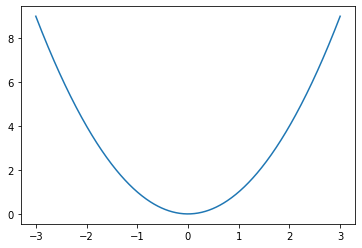

In [ ]:
import numpy as np
x = np.linspace(-3,3,500)
y = x**2

plt.plot(x,y)
plt.show()

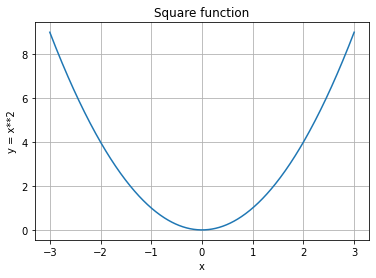

In [ ]:
plt.plot(x, y)
plt.title("Square function")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.grid(True)
plt.show()

# 2장
#그래프의 선의 스타일과 색상

rgb 색상

g-- green 점선
r- red 실선

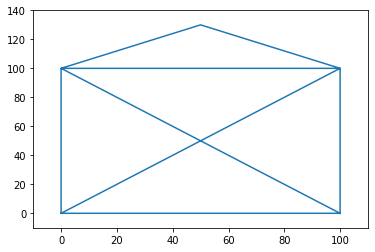

In [ ]:
plt.plot([0,100,100,0,0,100,50,0,100],[0, 0, 100, 100, 0, 100, 130, 100, 0]) 
plt.axis([-10,110,-10,140])
plt.show()

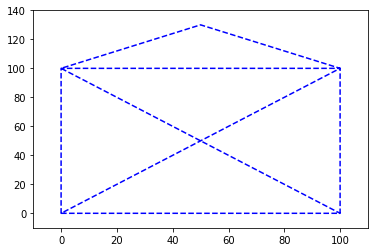

In [ ]:
plt.plot([0,100,100,0,0,100,50,0,100],[0, 0, 100, 100, 0, 100, 130, 100, 0], "b--") 
plt.axis([-10,110,-10,140])
plt.show()

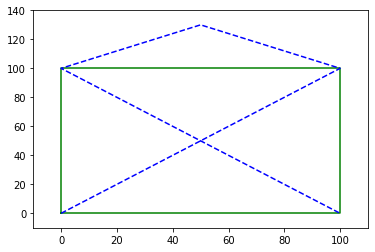

In [ ]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "g-", [0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "b--")
plt.axis([-10, 110, -10, 140])
plt.show()

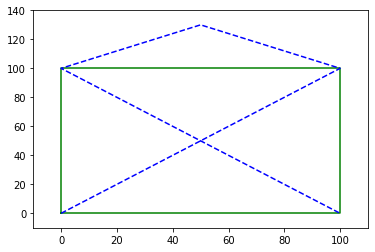

In [ ]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "g-")
plt.plot([0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "b--")
plt.axis([-10, 110, -10, 140])
plt.show()

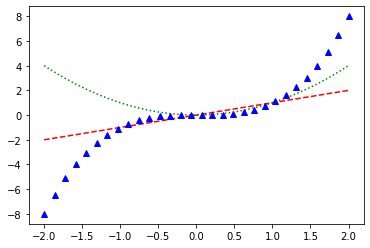

In [ ]:
x = np.linspace(-2.0, 2.0, 30)
plt.plot(x, x, 'r--', x, x**2, 'g:', x, x**3, 'b^')
plt.show()

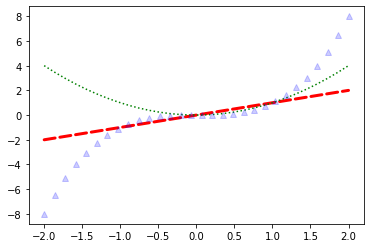

In [ ]:
x = np.linspace(-2.0, 2.0, 30)
line1, line2, line3 = plt.plot(x, x, 'r--', x, x**2, 'g:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

#3장
savefig를 이용해 plot되는 사진을 저장할수있다.

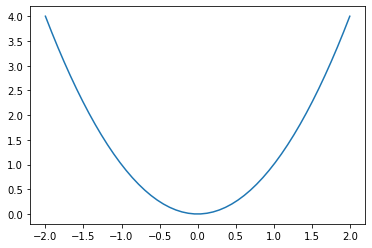

In [ ]:
x = np.linspace(-2.0, 2.0, 50)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent=True)

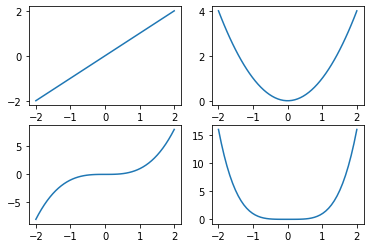

In [ ]:
x = np.linspace(-2.0, 2.0, 50)
plt.subplot(2, 2, 1)  
plt.plot(x, x)
plt.subplot(2, 2, 2)  
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  
plt.plot(x, x**4)
plt.show()

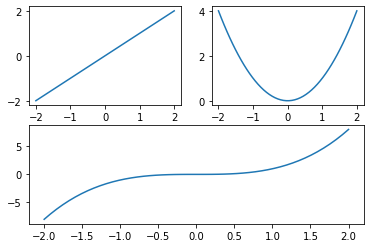

In [ ]:
plt.subplot(2, 2, 1)  
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)
plt.show()

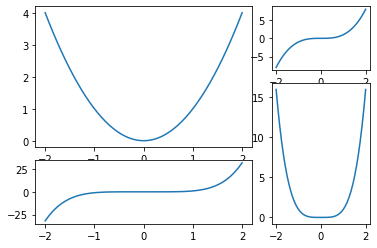

In [ ]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

#4장
subplots

그래프를 row랑 column에 따라 보여지는 위치 설정 할 수 있음

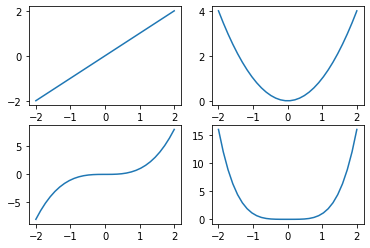

In [ ]:
x = np.linspace(-2.0, 2.0, 30)
plt.subplot(2, 2, 1)  
plt.plot(x, x)
plt.subplot(2, 2, 2)  
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  
plt.plot(x, x**4)
plt.show()

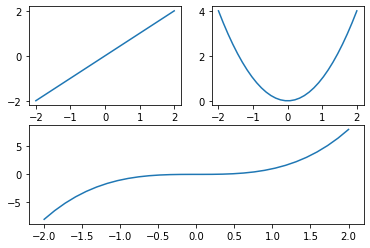

In [ ]:
plt.subplot(2, 2, 1) 
plt.plot(x, x)
plt.subplot(2, 2, 2) 
plt.plot(x, x**2)
plt.subplot(2, 1, 2) 
plt.plot(x, x**3)
plt.show()

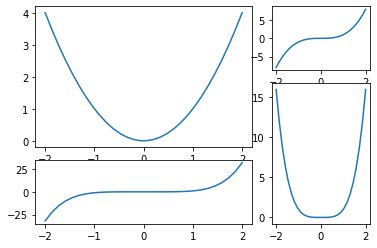

In [ ]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

#5장
Multiple figures

그래프를 내가 원하는 위치에 표현할 수 있다.

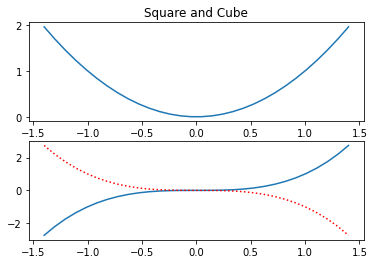

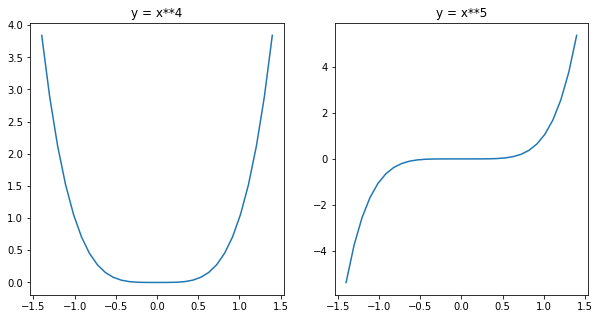

In [ ]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1) 
plt.plot(x, -x**3, "r:")

plt.show()

#9장
Legends

범례를 추가한다고 한다 근데 뭔뜻인지 잘 모르겠음..

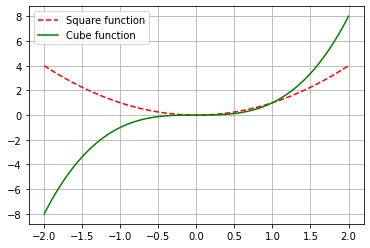

In [ ]:
x = np.linspace(-2, 2, 100)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

#14장

Scatter plot

diagram)는 직교 좌표계(도표)를 이용해 좌표상의 점(點)들을 표시함으로써 두 개 변수 간의 관계를 나타내는 그래프 방법이다.

scatter를 이용해 두개 변수간의 관계를 나타내는 그래프를 나타낼 수 있다.

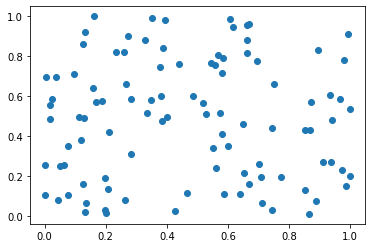

In [ ]:
from numpy.random import rand
x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

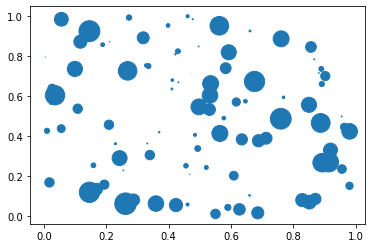

In [ ]:
x, y, scale = rand(3, 100)
scale = 500 * scale ** 3
plt.scatter(x, y, s=scale)
plt.show()

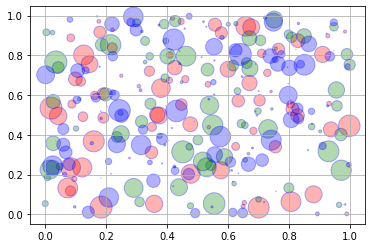

In [ ]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 3
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()